In [2]:
from time import sleep
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.153'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/211109-10740-qcodes.log
Connected to: QDevil QDAC-II (serial:48762, firmware:5-0.9.26) in 0.27s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.05s


In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [5]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.05')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.08')
scope.write('tim:scal 1e-3')
scope.write('tim:offs 0')

In [6]:
sine = qdac.ch03.sine_wave()

In [7]:
scope.write('run')
sine.start()

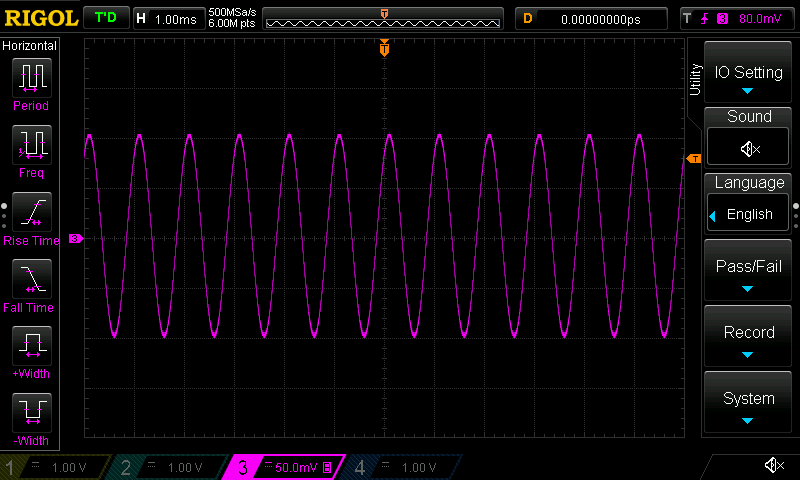

In [8]:
capture()

In [9]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.5')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.2')
scope.write('tim:scal 100e-6')
scope.write('tim:offs 0')

In [10]:
sine = qdac.ch03.sine_wave(
    period_s=200e-6,
    span_V=1,
    offset_V=0.5
)

In [11]:
scope.write('run')
sine.start()

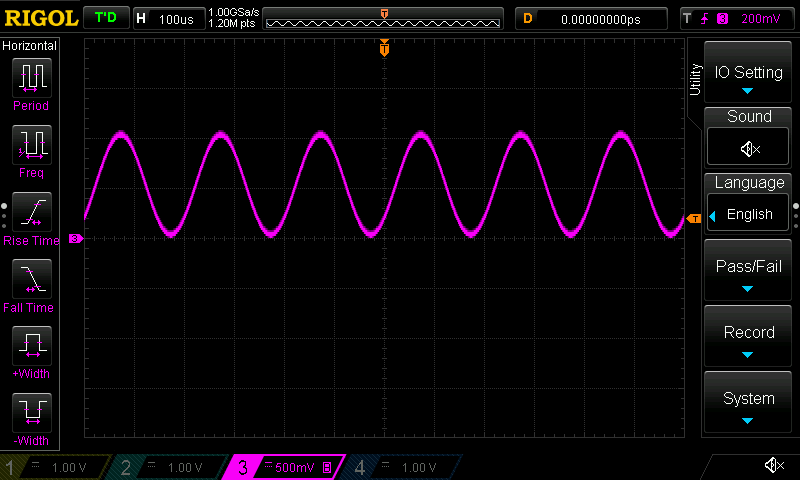

In [12]:
capture()

In [13]:
sine = qdac.ch03.sine_wave(
    period_s=200e-6,
    span_V=1,
    repetitions=4,
    slew_V_s=20000
)
sleep(3)
qdac.errors()

'0, "No error"'

In [14]:
scope.write('tim:offs 400e-6')
scope.write('sing')
sleep(3)
sine.start()

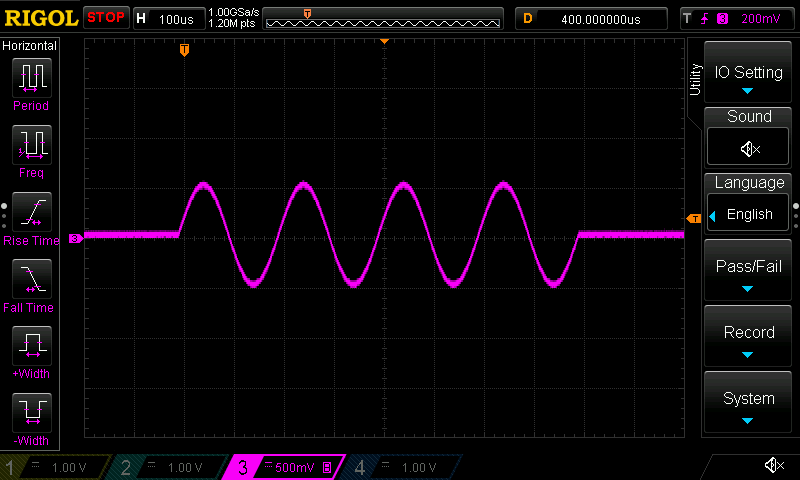

In [15]:
sleep(1)
capture()

In [16]:
trigger = sine.period_end_marker()
qdac.ext4.width_s(2e-5)
qdac.ext4.source_from_trigger(trigger)
scope.write('chan4:disp on')
scope.write('chan4:bwl on')
scope.write('chan4:prob 1')
scope.write('chan4:scal 1')
scope.write('chan4:offs -2')
qdac.errors()

'0, "No error"'

In [17]:
scope.write('sing')
sleep(3)
sine.start()

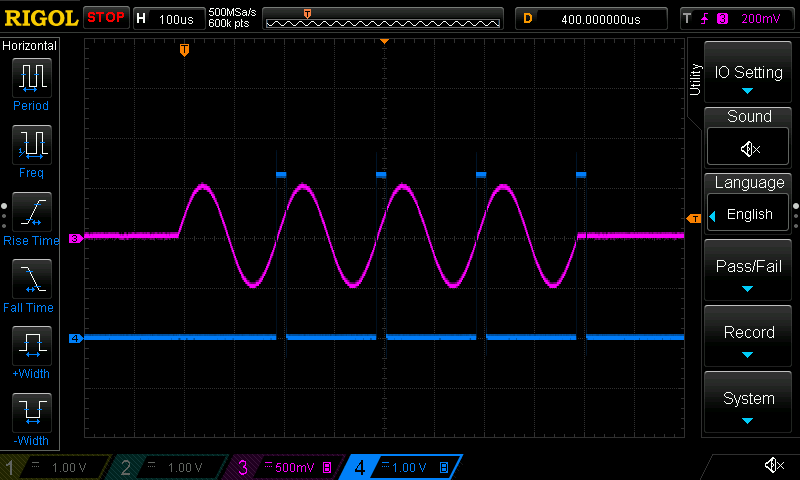

In [18]:
sleep(1)
capture()